#
We run ROAD (faithfulness) from Quantus on RISE and a random baseline and get unexplainable bad results.

In [8]:
import warnings
warnings.filterwarnings('ignore') # disable warnings relateds to versions of tf
import numpy as np
import dianna
import quantus

In [9]:
quantus.helpers.constants.available_categories()

['Faithfulness',
 'Robustness',
 'Localisation',
 'Complexity',
 'Randomisation',
 'Axiomatic']

In [10]:
quantus.helpers.constants.available_metrics()

{'Faithfulness': ['Faithfulness Correlation',
  'Faithfulness Estimate',
  'Pixel-Flipping',
  'Region Segmentation',
  'Monotonicity-Arya',
  'Monotonicity-Nguyen',
  'Selectivity',
  'SensitivityN',
  'IROF',
  'ROAD',
  'Infidelity',
  'Sufficiency'],
 'Robustness': ['Continuity Test',
  'Local Lipschitz Estimate',
  'Max-Sensitivity',
  'Avg-Sensitivity',
  'Consistency',
  'Relative Input Stability',
  'Relative Output Stability',
  'Relative Representation Stability'],
 'Localisation': ['Pointing Game',
  'Top-K Intersection',
  'Relevance Mass Accuracy',
  'Relevance Rank Accuracy',
  'Attribution Localisation ',
  'AUC',
  'Focus'],
 'Complexity': ['Sparseness', 'Complexity', 'Effective Complexity'],
 'Randomisation': ['MPRT', 'Smooth MPRT', 'Efficient MPRT', 'Random Logit'],
 'Axiomatic': ['Completeness', 'NonSensitivity', 'InputInvariance']}

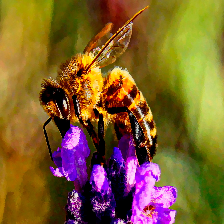

In [11]:
def load_img(path, target_size):
    from tensorflow.keras.preprocessing import image
    from tensorflow.keras.applications.resnet50 import preprocess_input
    img = image.load_img(path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

bee_img, bee_arr = load_img('C:/Users/ChristiaanMeijer/OneDrive - Netherlands eScience Center/Documents/dianna/dianna-exploration/example_data/xai_method_study/RISE/bee.jpg', (224,224,3))
bee_img

In [12]:
import matplotlib.pyplot as plt

def plot_hist(result):
    data = []
    for key, value in result.items():
        for _ in range(int(value)):
            data.append(key)

    # plot the histogram
    plt.hist(data, bins=range(0, 101, 10), align='mid')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Results')
    plt.show()

In [13]:
from tensorflow.keras.applications.resnet50 import ResNet50
model = ResNet50()

def random_xai(model, input_data, method, labels, **kwargs):
    output = np.random.randn(*input_data.shape[:-1])[None,...]
    return output

random_result = quantus.AvgSensitivity(
    nr_samples=50,
    # perturb_func=quantus.perturb_func.gaussian_noise,
)(model=model,
   x_batch=bee_arr,
   y_batch=[309],
   a_batch=None,
   explain_func= random_xai,
   explain_func_kwargs={'model_or_function': model,
                        "input_data": bee_arr[0],
                        "method": "RISE",
                        "labels": range(1),
                       }
)
print(random_result)


[1.4157706749803092]


In [14]:
random_result

[1.4157706749803092]

In [15]:
from pandas import DataFrame
from tensorflow.keras.applications.resnet50 import ResNet50
model = ResNet50()
result = []
for i in range(10):
    result.append(quantus.AvgSensitivity(
        nr_samples=1,

        # perturb_func=quantus.perturb_func.gaussian_noise,
    )(model=model,
       x_batch=bee_arr,
       y_batch=[309],
       a_batch=None,
       explain_func=dianna.explain_image,
       explain_func_kwargs={'model_or_function': model,
                            "input_data": bee_arr[0],
                            "method": "RISE",
                            "labels": range(1),
                            "p_keep": 0.1,
                            "n_masks": 500,
                           }
    ))
    r_df = DataFrame(result)
    print(r_df)
    r_df.describe()


Explaining: 100%|██████████| 5/5 [00:27<00:00,  5.41s/it]


         0
0  0.59491


Explaining: 100%|██████████| 5/5 [00:26<00:00,  5.27s/it]


         0
0  0.59491
1  0.56227


Explaining: 100%|██████████| 5/5 [00:26<00:00,  5.24s/it]


          0
0  0.594910
1  0.562270
2  0.714157


Explaining: 100%|██████████| 5/5 [00:26<00:00,  5.27s/it]


          0
0  0.594910
1  0.562270
2  0.714157
3  0.650523


Explaining: 100%|██████████| 5/5 [00:28<00:00,  5.79s/it]


          0
0  0.594910
1  0.562270
2  0.714157
3  0.650523
4  0.401454


Explaining: 100%|██████████| 5/5 [00:27<00:00,  5.48s/it]


          0
0  0.594910
1  0.562270
2  0.714157
3  0.650523
4  0.401454
5  0.659686


Explaining: 100%|██████████| 5/5 [00:27<00:00,  5.55s/it]


          0
0  0.594910
1  0.562270
2  0.714157
3  0.650523
4  0.401454
5  0.659686
6  0.682740


Explaining: 100%|██████████| 5/5 [00:28<00:00,  5.76s/it]


          0
0  0.594910
1  0.562270
2  0.714157
3  0.650523
4  0.401454
5  0.659686
6  0.682740
7  0.679525


Explaining: 100%|██████████| 5/5 [00:27<00:00,  5.56s/it]


          0
0  0.594910
1  0.562270
2  0.714157
3  0.650523
4  0.401454
5  0.659686
6  0.682740
7  0.679525
8  0.783754


Explaining: 100%|██████████| 5/5 [00:29<00:00,  5.88s/it]


          0
0  0.594910
1  0.562270
2  0.714157
3  0.650523
4  0.401454
5  0.659686
6  0.682740
7  0.679525
8  0.783754
9  0.612512


In [17]:
from pandas import DataFrame
from tensorflow.keras.applications.resnet50 import ResNet50
model = ResNet50()
result = []
for i in range(10):
    result.append(quantus.AvgSensitivity(
        nr_samples=1,
        perturb_func_kwargs={'perturb_std':0.1*255,}
        # perturb_func=quantus.perturb_func.gaussian_noise,
    )(model=model,
       x_batch=bee_arr,
       y_batch=[309],
       a_batch=None,
       explain_func=dianna.explain_image,
       explain_func_kwargs={'model_or_function': model,
                            "input_data": bee_arr[0],
                            "method": "RISE",
                            "labels": range(1),
                            "p_keep": 0.1,
                            "n_masks": 500,
                           }
    ))
    r_df = DataFrame(result)
    print(r_df)
    r_df.describe()

Explaining: 100%|██████████| 5/5 [00:27<00:00,  5.49s/it]


          0
0  0.459162


Explaining: 100%|██████████| 5/5 [00:27<00:00,  5.54s/it]


          0
0  0.459162
1  0.969285


Explaining: 100%|██████████| 5/5 [00:27<00:00,  5.52s/it]


          0
0  0.459162
1  0.969285
2  1.138734


Explaining: 100%|██████████| 5/5 [00:27<00:00,  5.49s/it]


          0
0  0.459162
1  0.969285
2  1.138734
3  0.657417


Explaining: 100%|██████████| 5/5 [00:28<00:00,  5.66s/it]


          0
0  0.459162
1  0.969285
2  1.138734
3  0.657417
4  0.594076


Explaining: 100%|██████████| 5/5 [00:29<00:00,  5.86s/it]


          0
0  0.459162
1  0.969285
2  1.138734
3  0.657417
4  0.594076
5  0.815681


Explaining: 100%|██████████| 5/5 [00:28<00:00,  5.66s/it]


          0
0  0.459162
1  0.969285
2  1.138734
3  0.657417
4  0.594076
5  0.815681
6  0.469571


Explaining: 100%|██████████| 5/5 [00:28<00:00,  5.75s/it]


          0
0  0.459162
1  0.969285
2  1.138734
3  0.657417
4  0.594076
5  0.815681
6  0.469571
7  0.543209


Explaining: 100%|██████████| 5/5 [00:29<00:00,  5.83s/it]


          0
0  0.459162
1  0.969285
2  1.138734
3  0.657417
4  0.594076
5  0.815681
6  0.469571
7  0.543209
8  1.399329


Explaining: 100%|██████████| 5/5 [00:29<00:00,  5.86s/it]


          0
0  0.459162
1  0.969285
2  1.138734
3  0.657417
4  0.594076
5  0.815681
6  0.469571
7  0.543209
8  1.399329
9  0.661459


In [ ]:
[0.11276582301323408][0.08319267603621364]

We saw a small correlation but the number of masked pixels was less than 1% so not a lot of change in output could be expected to start with.
We try again with a larger subset size.

In [ ]:
# Average Sensitivity: RISE
from tensorflow.keras.applications.resnet50 import ResNet50
model = ResNet50()

result = quantus.FaithfulnessCorrelation(
    nr_runs=1000,
    subset_size=224*224//2

    # perturb_func=quantus.perturb_func.gaussian_noise,
)(model=model,
   x_batch=bee_arr,
   y_batch=[309],
   a_batch=None,
   explain_func=dianna.explain_image,
   explain_func_kwargs={'model_or_function': model,
                        "input_data": bee_arr[0],
                        "method": "RISE",
                        "labels": range(1),
                        "p_keep": 0.1,
                        "n_masks": 1000,
                       }
)
print(result)